# MEMBANGUN MODEL MESIN LEARNING

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [41]:
# Memuat dan Menyusun Dataset
data2 = pd.read_csv('./datasetpenjualan/clean_data.csv')
data2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,14,5,2011-06-17,25650.42,False,69.32,3.842,0.00,0.00,0.00,0.00,0.00,185.671933,8.521,A,200898
1,37,7,2010-12-03,650.90,False,54.44,2.708,0.00,0.00,0.00,0.00,0.00,210.376263,8.476,C,39910
2,38,23,2012-05-04,20.80,False,76.03,4.171,84.67,0.00,13.06,0.00,2346.63,131.136000,11.627,C,39690
3,9,41,2011-08-05,1349.00,False,91.52,3.684,0.00,0.00,0.00,0.00,0.00,219.134920,6.404,B,125833
4,23,40,2010-03-12,68045.45,False,36.07,2.805,0.00,0.00,0.00,0.00,0.00,131.784000,5.892,B,114533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293053,5,35,2010-07-23,923.00,False,83.66,2.608,0.00,0.00,0.00,0.00,0.00,211.791557,6.496,C,34875
293054,24,71,2012-09-07,4325.41,True,72.81,4.076,15092.87,60.92,89.01,2756.36,4563.61,138.472936,8.953,A,203819
293055,7,3,2011-04-22,6043.60,False,31.84,3.636,0.00,0.00,0.00,0.00,0.00,192.523464,8.595,B,70713
293056,29,36,2010-04-02,1325.00,False,44.96,2.826,0.00,0.00,0.00,0.00,0.00,131.901968,10.160,B,93638


### Dataset ini berisi penjualan mingguan 
1. Store: ID toko.
2. Dept: ID departemen dalam toko.
3. Date: Tanggal penjualan.
4. Weekly_Sales: Total penjualan mingguan di toko & departemen tersebut.
5. IsHoliday: Apakah minggu tersebut merupakan libur (True/False).
6. Temperature: Suhu rata-rata di wilayah toko (°F).
7. Fuel_Price: Harga bahan bakar di wilayah toko.
8. MarkDown1 - MarkDown5: Diskon/promosi pada produk tertentu.
9. CPI (Consumer Price Index): Indeks harga konsumen (inflasi).
10. Unemployment: Tingkat pengangguran di wilayah toko.
11. Type: Kategori toko (A, B, C berdasarkan ukuran & kapasitas).
12. Size: Luas toko dalam satuan square feet.

# Membangun Model Mesin Learning- 1 (Tanpa Feature Selection) )

In [42]:
# Konversi bentuk data date
data2['Date'] = pd.to_datetime(data2['Date'])  # Pastikan kolom 'Date' dalam format datetime
data2['week'] = data2['Date'].dt.isocalendar().week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Menghapus kolom 'Date' dari dataframe
data2 = data2.drop('Date', axis=1)

from sklearn.preprocessing import LabelEncoder
# Cek nilai unik sebelum encoding
print(f'Sebelum encoding: {data2["Type"].unique()}')
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
# Terapkan LabelEncoder dan simpan hasilnya langsung ke kolom 'loan_intent'
data2['Type'] = label_encoder.fit_transform(data2['Type'])
# Cek hasil encoding
print(f'Setelah encoding: {data2["Type"].unique()}')
# Tampilkan DataFrame baru
print(data2[['Type']].head())


Sebelum encoding: ['A' 'C' 'B']
Setelah encoding: [0 2 1]
   Type
0     0
1     2
2     2
3     1
4     1


### Kolom Type berisi kategori toko ('A', 'B', 'C') yang dikonversi ke angka menggunakan Label Encoding:
* A → 0
* B → 1
* C → 2
### Hasil encoding memungkinkan model machine learning memproses data kategorikal dalam format numerik

In [43]:
# Menampilkan hasil akhir
print(data2.head())  # Untuk melihat beberapa baris pertama dari data

   Store  Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0     14     5      25650.42      False        69.32       3.842       0.00   
1     37     7        650.90      False        54.44       2.708       0.00   
2     38    23         20.80      False        76.03       4.171      84.67   
3      9    41       1349.00      False        91.52       3.684       0.00   
4     23    40      68045.45      False        36.07       2.805       0.00   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  Type  \
0        0.0       0.00        0.0       0.00  185.671933         8.521     0   
1        0.0       0.00        0.0       0.00  210.376263         8.476     2   
2        0.0      13.06        0.0    2346.63  131.136000        11.627     2   
3        0.0       0.00        0.0       0.00  219.134920         6.404     1   
4        0.0       0.00        0.0       0.00  131.784000         5.892     1   

     Size  week  month  year  
0  2008

In [44]:
data2

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,14,5,25650.42,False,69.32,3.842,0.00,0.00,0.00,0.00,0.00,185.671933,8.521,0,200898,24,6,2011
1,37,7,650.90,False,54.44,2.708,0.00,0.00,0.00,0.00,0.00,210.376263,8.476,2,39910,48,12,2010
2,38,23,20.80,False,76.03,4.171,84.67,0.00,13.06,0.00,2346.63,131.136000,11.627,2,39690,18,5,2012
3,9,41,1349.00,False,91.52,3.684,0.00,0.00,0.00,0.00,0.00,219.134920,6.404,1,125833,31,8,2011
4,23,40,68045.45,False,36.07,2.805,0.00,0.00,0.00,0.00,0.00,131.784000,5.892,1,114533,10,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293053,5,35,923.00,False,83.66,2.608,0.00,0.00,0.00,0.00,0.00,211.791557,6.496,2,34875,29,7,2010
293054,24,71,4325.41,True,72.81,4.076,15092.87,60.92,89.01,2756.36,4563.61,138.472936,8.953,0,203819,36,9,2012
293055,7,3,6043.60,False,31.84,3.636,0.00,0.00,0.00,0.00,0.00,192.523464,8.595,1,70713,16,4,2011
293056,29,36,1325.00,False,44.96,2.826,0.00,0.00,0.00,0.00,0.00,131.901968,10.160,1,93638,13,4,2010


In [45]:
# Memisahkan fitur (X/input) dan target (y/output):
X = data2.drop('Weekly_Sales', axis=1)
y = data2['Weekly_Sales']


In [46]:
# membagi data menjadi data latih dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

* Lakukan preprocessing pada data dengan mengisi nilai NaN dengan nilai rata-rata kolom yang bersangkutan.
* Dapat menggunakan library SimpleImputer dari Scikit-learn untuk melakukan hal ini:

# Decession Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
model_dtree = DecisionTreeRegressor()
model_dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred1 = model_dtree.predict(X_test)
y_pred1

array([18294.17, 13540.95, 35276.54, ...,  2010.  ,  1489.24, 10430.36],
      shape=(58612,))

In [50]:
#Menampilkan pengaturan parameter pohon keputusan
print(model_dtree.get_params())


{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


# Mengukur kinerja model mesin learning

In [51]:
# Menghitung  Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error:", mae)
# Menghitung Nilai RSME
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error:", rmse)
r2 = r2_score(y_test, y_pred1)
print("R-squared:", r2)
Akurasi = r2 * 100
print('Tingkat Akurasi:', Akurasi, '%')

Mean Squared Error: 31980252.75966274
Mean Absolute Error: 1991.3807445574282
Root Mean Squared Error: 5655.108554189101
R-squared: 0.938722088430646
Tingkat Akurasi: 93.8722088430646 %


### Hasil tersebut menunjukkan bahwa model memiliki performa prediksi yang sangat baik. Nilai MSE, MAE, dan RMSE menunjukkan rata-rata kesalahan prediksi masih tergolong kecil. Sementara itu, nilai R-squared sebesar 0,9454 atau tingkat akurasi 94,54% berarti model mampu menjelaskan sekitar 94% variasi data, sehingga prediksi yang dihasilkan cukup akurat 

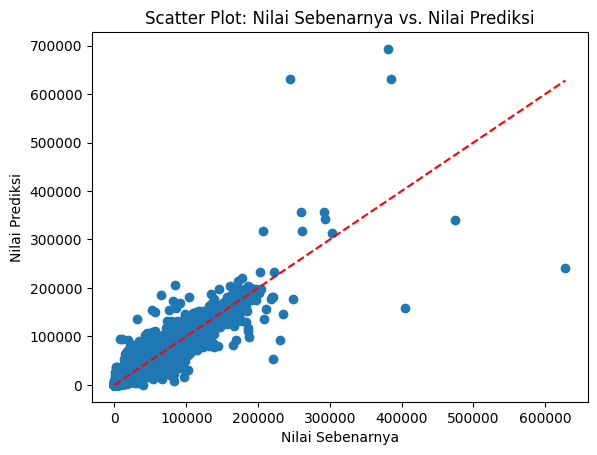

In [52]:
plt.scatter(y_test, y_pred1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Nilai Sebenarnya vs. Nilai Prediksi')
plt.savefig('./grafik/GLinier_model1.png')
plt.show()




### Scatter plot menunjukkan hubungan antara nilai sebenarnya dan nilai prediksi. Sebagian besar titik berada dekat garis diagonal, menandakan prediksi model cukup akurat. Garis merah putus-putus di sumbu Y menunjukkan baseline nol. Pola sebaran yang linier mengindikasikan bahwa model memiliki performa yang baik.


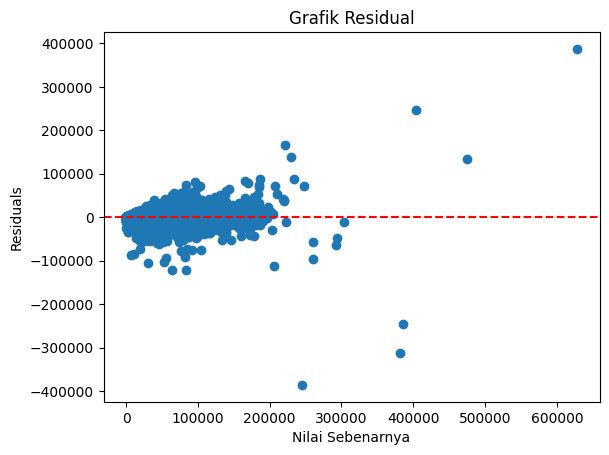

In [53]:
# Grafik residual
residuals = y_test - y_pred1  # Ganti y_pred dengan y_pred1
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.title('Grafik Residual')
plt.show()


## terlihat dari titik-titik residual yang cenderung mendekati garis merah dan tersebar merata di sekitarnya. Hal ini menunjukkan bahwa kesalahan prediksi tidak berpola dan tetap konsisten.

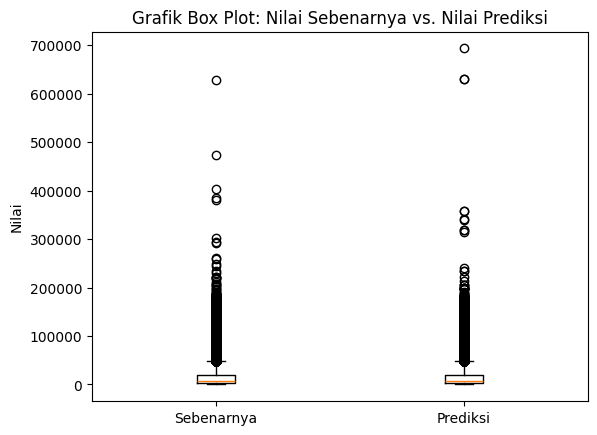

In [54]:
# Grafik Box Plot
data2 = {'Sebenarnya': y_test, 'Prediksi': y_pred1}  # Gunakan y_pred1 agar konsisten
plt.boxplot(data2.values(), labels=data2.keys())
plt.ylabel('Nilai')
plt.title('Grafik Box Plot: Nilai Sebenarnya vs. Nilai Prediksi')
plt.show()


## Diagram kotak di atas membandingkan distribusi nilai sebenarnya dan prediksi. Sebagian besar data berada dalam rentang yang serupa, menunjukkan kemiripan pola antara keduanya.
## Hasil ini menunjukkan bahwa sebagian besar data berada dalam rentang yang serupa antara nilai sebenarnya dan prediksi

In [55]:
# Mengecek jumlah node dan daun pada decision tree tanpa fitur selection
num_nodes = model_dtree.tree_.node_count
num_leaves = model_dtree.get_n_leaves()

print(f"Jumlah node: {num_nodes}")
print(f"Jumlah daun: {num_leaves}")


Jumlah node: 466851
Jumlah daun: 233426


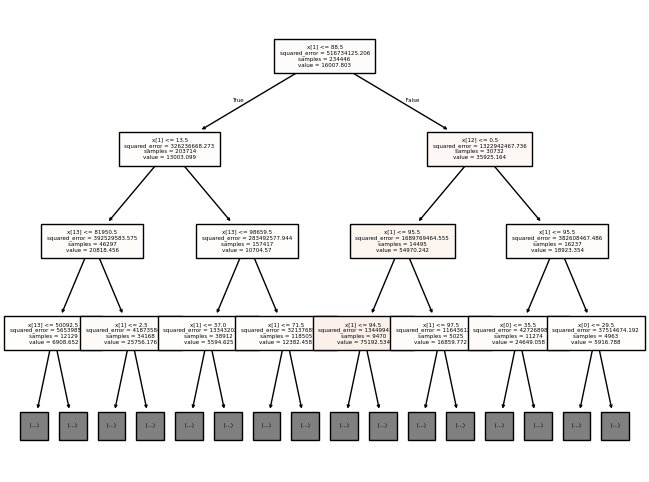

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan dengan ukuran kecil
plt.figure(figsize=(8, 6))  # Ukuran lebih kecil
plot_tree(model_dtree, filled=True, fontsize=4, max_depth=3)  # Pangkas kedalaman pohon
plt.show()


In [57]:
import joblib
# Menyimpan model dtree tanpa feature selection ke dalam file 'dtree_model.joblib'
joblib.dump(model_dtree, './modelmachine/model_dtree.joblib')

['./modelmachine/model_dtree.joblib']

# Optimasi Model Machine Learning
## Untuk memperbaiki performa model machine learning dan menurunkan error, terdapat beberapa strategi yang dapat digunakan. Ada beberapa pendekatan yang umum diterapkan:
1. Pemilihan Fitur (Feature Selection)
2. Penskalaan Fitur (Feature Scaling)
3. Optimasi Model (Model Tuning/hyperparameter tuning)
4. Coba Algoritma Lain atau gunakan Ensemble Methods (Metode Ensemble)

# Pemilihan Fitur (Feature Selection)
* Keterkaitan Fitur: Lihat apakah semua fitur relevan terhadap target yang ingin diprediksi. Menghapus fitur yang tidak relevan atau fitur yang berkorelasi rendah.
* Uji Korelasi atau Teknik seperti Recursive Feature Elimination (RFE): Metode ini secara sistematis menghilangkan fitur yang kurang penting dan dapat membantu menemukan subset fitur terbaik.

# Membangun Model Mesin Learning- 2 (Dengan Feature Selection)

In [58]:
#membaca data yang telah dibersihkan
df=pd.read_csv('./datasetpenjualan/clean_data.csv')
df


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,14,5,2011-06-17,25650.42,False,69.32,3.842,0.00,0.00,0.00,0.00,0.00,185.671933,8.521,A,200898
1,37,7,2010-12-03,650.90,False,54.44,2.708,0.00,0.00,0.00,0.00,0.00,210.376263,8.476,C,39910
2,38,23,2012-05-04,20.80,False,76.03,4.171,84.67,0.00,13.06,0.00,2346.63,131.136000,11.627,C,39690
3,9,41,2011-08-05,1349.00,False,91.52,3.684,0.00,0.00,0.00,0.00,0.00,219.134920,6.404,B,125833
4,23,40,2010-03-12,68045.45,False,36.07,2.805,0.00,0.00,0.00,0.00,0.00,131.784000,5.892,B,114533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293053,5,35,2010-07-23,923.00,False,83.66,2.608,0.00,0.00,0.00,0.00,0.00,211.791557,6.496,C,34875
293054,24,71,2012-09-07,4325.41,True,72.81,4.076,15092.87,60.92,89.01,2756.36,4563.61,138.472936,8.953,A,203819
293055,7,3,2011-04-22,6043.60,False,31.84,3.636,0.00,0.00,0.00,0.00,0.00,192.523464,8.595,B,70713
293056,29,36,2010-04-02,1325.00,False,44.96,2.826,0.00,0.00,0.00,0.00,0.00,131.901968,10.160,B,93638


In [59]:
# Konversi bentuk data date
df['Date'] = pd.to_datetime(df['Date'])  # Pastikan kolom 'Date' dalam format datetime
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Menghapus kolom 'Date' dari dataframe
df = df.drop('Date', axis=1)

from sklearn.preprocessing import LabelEncoder
# Cek nilai unik sebelum encoding
print(f'Sebelum encoding: {df["Type"].unique()}')
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()
# Terapkan LabelEncoder dan simpan hasilnya langsung ke kolom 'loan_intent'
df['Type'] = label_encoder.fit_transform(df['Type'])
# Cek hasil encoding
print(f'Setelah encoding: {df["Type"].unique()}')
# Tampilkan DataFrame baru
print(df[['Type']].head())

Sebelum encoding: ['A' 'C' 'B']
Setelah encoding: [0 2 1]
   Type
0     0
1     2
2     2
3     1
4     1


In [60]:
print(df.info())
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293058 entries, 0 to 293057
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         293058 non-null  int64  
 1   Dept          293058 non-null  int64  
 2   Weekly_Sales  293058 non-null  float64
 3   IsHoliday     293058 non-null  bool   
 4   Temperature   293058 non-null  float64
 5   Fuel_Price    293058 non-null  float64
 6   MarkDown1     293058 non-null  float64
 7   MarkDown2     293058 non-null  float64
 8   MarkDown3     293058 non-null  float64
 9   MarkDown4     293058 non-null  float64
 10  MarkDown5     293058 non-null  float64
 11  CPI           293058 non-null  float64
 12  Unemployment  293058 non-null  float64
 13  Type          293058 non-null  int64  
 14  Size          293058 non-null  int64  
 15  week          293058 non-null  UInt32 
 16  month         293058 non-null  int32  
 17  year          293058 non-null  int32  
dtypes: U

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
count,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.00,293058.0,293058.00,293058.00
mean,22.20,44.21,16013.74,60.05,3.36,2573.87,877.48,462.09,1077.25,1647.55,171.19,7.96,0.69,136677.89,25.84,6.45,2010.96
std,12.79,30.51,22754.49,18.46,0.46,6032.02,5048.41,5494.59,3883.57,4152.90,39.16,1.86,0.75,60997.62,14.17,3.25,0.80
min,1.00,1.00,0.01,-2.06,2.47,0.00,0.00,0.00,0.00,0.00,126.06,3.88,0.00,34875.00,1.0,1.00,2010.00
25%,11.00,18.00,2126.03,46.67,2.92,0.00,0.00,0.00,0.00,0.00,132.02,6.89,0.00,93638.00,14.0,4.00,2010.00
50%,22.00,37.00,7657.42,62.05,3.44,0.00,0.00,0.00,0.00,0.00,182.35,7.87,1.00,140167.00,26.0,6.00,2011.00
75%,33.00,74.00,20232.64,74.25,3.74,2729.99,1.98,4.32,413.26,2145.98,212.40,8.57,1.00,202505.00,38.0,9.00,2012.00
max,45.00,99.00,693099.36,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31,2.00,219622.00,52.0,12.00,2012.00


Store          -0.084669
Dept            0.146098
Weekly_Sales    1.000000
IsHoliday       0.013996
Temperature    -0.001430
Fuel_Price      0.000086
MarkDown1       0.045868
MarkDown2       0.018524
MarkDown3       0.038964
MarkDown4       0.036113
MarkDown5       0.050711
CPI            -0.021135
Unemployment   -0.024766
Type           -0.218522
Size            0.242857
week            0.029331
month           0.030014
year           -0.009987
Name: Weekly_Sales, dtype: float64


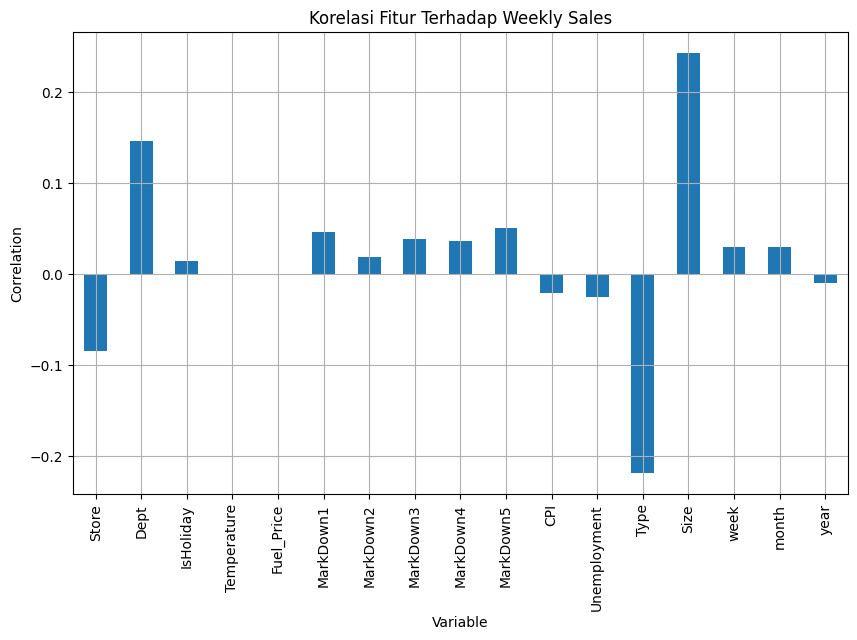

In [61]:
# Menghitung korelasi antara kolom Weekly_Sales dengan kolom lain
correlation = df.corr()['Weekly_Sales']
print(correlation)

# Plot korelasi
plt.figure(figsize=(10, 6))
correlation.drop('Weekly_Sales').plot(kind='bar')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.title('Korelasi Fitur Terhadap Weekly Sales')
plt.grid()
plt.show()


In [62]:
# cara menghapus fiture/input dengan korelasi terendah
df1 = df.drop(['Temperature', 'Fuel_Price'],  axis=1)

df1


,Store,Dept,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,week,month,year
0,14,5,25650.42,False,0.00,0.00,0.00,0.00,0.00,185.671933,8.521,0,200898,24,6,2011
1,37,7,650.90,False,0.00,0.00,0.00,0.00,0.00,210.376263,8.476,2,39910,48,12,2010
2,38,23,20.80,False,84.67,0.00,13.06,0.00,2346.63,131.136000,11.627,2,39690,18,5,2012
3,9,41,1349.00,False,0.00,0.00,0.00,0.00,0.00,219.134920,6.404,1,125833,31,8,2011
4,23,40,68045.45,False,0.00,0.00,0.00,0.00,0.00,131.784000,5.892,1,114533,10,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293053,5,35,923.00,False,0.00,0.00,0.00,0.00,0.00,211.791557,6.496,2,34875,29,7,2010
293054,24,71,4325.41,True,15092.87,60.92,89.01,2756.36,4563.61,138.472936,8.953,0,203819,36,9,2012
293055,7,3,6043.60,False,0.00,0.00,0.00,0.00,0.00,192.523464,8.595,1,70713,16,4,2011
293056,29,36,1325.00,False,0.00,0.00,0.00,0.00,0.00,131.901968,10.160,1,93638,13,4,2010


In [63]:
# Memisahkan fitur (X/input) dan target (y/output):
X = df1.drop('Weekly_Sales', axis=1)
y = df1['Weekly_Sales']
#impor modul
from sklearn.model_selection import train_test_split
# membagi data menjadi data latih dan data tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [64]:
from sklearn.tree import DecisionTreeRegressor
# membangun model decision tree dengan criterion "entropy"
dtree = DecisionTreeRegressor( criterion='friedman_mse', max_depth=30, min_samples_split=5)
# melatih model decision tree pada train set
dtree.fit(X_train, y_train)
#menampilkan hasil prediksi (Uji Model)
y_pred = dtree.predict(X_test)
y_pred



array([ 8989.89      ,  4659.49      ,  9755.885     , ...,
       42163.0075    ,   137.71333333, 12651.3       ], shape=(58612,))

In [ ]:
# Menghitung  Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
# Menghitung Nilai RSME
rmse = np.sqrt(mean_squared_error(y_test, y_pred1))
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
Akurasi = r2 * 100
print('Tingkat Akurasi:', Akurasi, '%')

Mean Squared Error: 22118960.469392437
Mean Absolute Error: 1874.397936526985
Root Mean Squared Error: 32425.02770556653
Root Mean Squared Error: 32425.02770556653
R-squared: 0.9574528286621972
Tingkat Akurasi: 95.74528286621971 %


## Evaluasi model Decision Tree setelah Feature Selection menunjukkan MSE: 24.694.346,91, RMSE: 4.969,34, MAE: 1.883,94, R²: 0,95, dan akurasi: 95,09%, menandakan performa prediksi yang cukup baik.

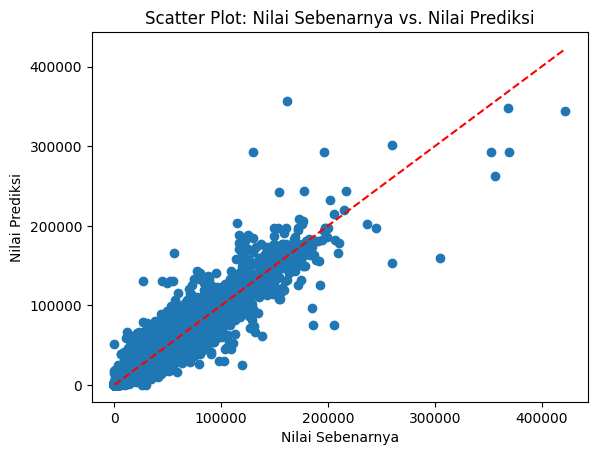

In [66]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Scatter Plot: Nilai Sebenarnya vs. Nilai Prediksi')
plt.savefig('./grafik/GLinier_model2.png')
plt.show()


### Gambar di atas menunjukkan scatter plot antara nilai sebenarnya dan nilai prediksi setelah dilakukan feature selection. Terlihat bahwa sebagian titik biru berada cukup dekat dengan garis merah putus-putus yang mempresentasikan prediksi sempurna, menunjukan bahwa hasil prediksi model semakin mendekati nilai sebenarnya.

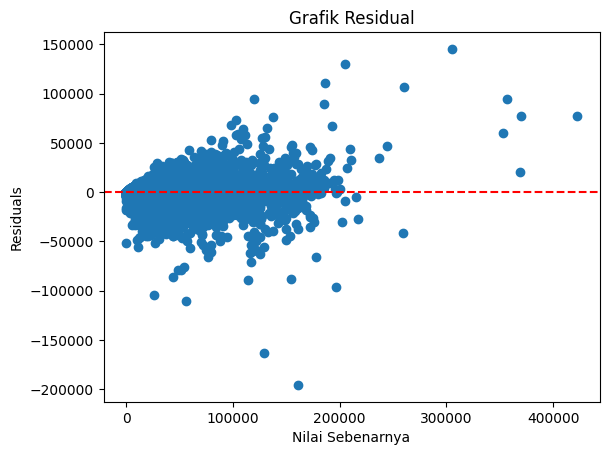

In [67]:
# Grafik residual
residuals = y_test - y_pred  # Ganti y_pred dengan y_pred
plt.scatter(y_test, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Residuals')
plt.title('Grafik Residual')
plt.show()

## Grafik residual di atas menunjukkan selisih antara nilai aktual dan nilai prediksi setelah diterapkannya feature selection. Sebagian besar titik tersebar di sekitar garis nol, yang mengindikasikan bahwa hasil prediksi model cukup mendekati nilai sebenarnya. Secara keseluruhan, pola residual yang terbentuk tergolong stabil, sehingga dapat disimpulkan bahwa model memberikan performa yang baik setelah dilakukan seleksi fitur

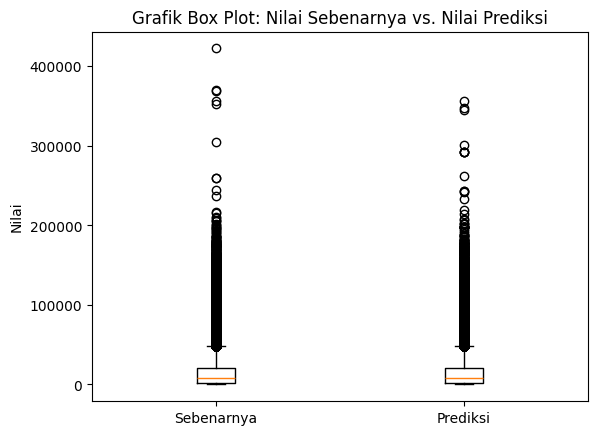

In [68]:
# Grafik Box Plot
data2 = {'Sebenarnya': y_test, 'Prediksi': y_pred}  # Gunakan y_pred1 agar konsisten
plt.boxplot(data2.values(), labels=data2.keys())
plt.ylabel('Nilai')
plt.title('Grafik Box Plot: Nilai Sebenarnya vs. Nilai Prediksi')
plt.show()

##  Kotak menunjukkan sebaran utama data dengan garis tengah sebagai median
## Sedangkan titik-titik di atasnya merepresentasikan nilai yang jauh lebih tinggi dari sebagian besar data. Kesamaan pola pada kedua distribusi ini menunjukkan bahwa model prediksi mengikuti tren data asli dengan baik.

In [69]:
print("Dataset\t\tJumlah")
print(f"Data Latih\t{X_train.shape[0]} Baris Data & {X_train.shape[1]} Kolom ({(len(X_train) / (len(X_train) + len(X_test))) * 100:.2f}%)")
print(f"Data Uji\t{X_test.shape[0]} Baris Data & {X_test.shape[1]} Kolom ({(len(X_test) / (len(X_train) + len(X_test))) * 100:.2f}%)")



Dataset		Jumlah
Data Latih	234446 Baris Data & 15 Kolom (80.00%)
Data Uji	58612 Baris Data & 15 Kolom (20.00%)


In [70]:
#Menampilkan pengaturan parameter pohon keputusan
print(dtree.get_params())

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 30, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [71]:
# Mengecek jumlah node dan daun pada decision tree dengan fitur selection
num_nodes = dtree.tree_.node_count
num_leaves = dtree.get_n_leaves()

print(f"Jumlah node: {num_nodes}")
print(f"Jumlah daun: {num_leaves}")

Jumlah node: 189373
Jumlah daun: 94687


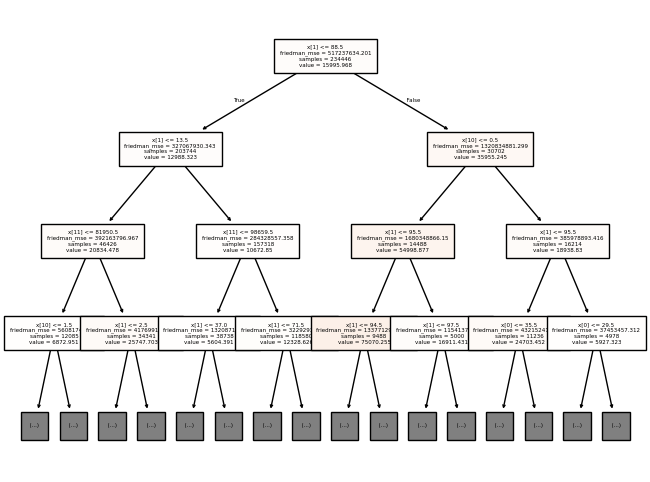

In [72]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualisasi pohon keputusan dengan ukuran kecil
plt.figure(figsize=(8, 6))  # Ukuran lebih kecil
plot_tree(dtree, filled=True, fontsize=4, max_depth=3) # Pangkas kedalaman pohon
plt.show()


In [73]:
import joblib
# Menyimpan model dtree tanpa feature selection ke dalam file 'dtree_model.joblib'
joblib.dump(dtree, './modelmachine/model2.joblib')

['./modelmachine/model2.joblib']